## Tragédia do Titanic
Um dos piores desastres marítimos da história teve início na noite de 14 de abril e terminou na manhã de 15 de abril de 1912, o luxuoso transatlântico RMS Titanic foi ao fundo do mar após colidir com um iceberg no Oceano Atlântico. O acidente aconteceu horas depois de o navio ter deixado o porto de Southampton, na Inglaterra, na véspera. Dos 2.224 passageiros a bordo, mais de 1500 pessoas morreram afogadas ou por conta do frio. Era o triste fim da viagem inaugural do Titanic, que deveria ter como destino final a cidade de Nova York. Pouco antes da meia-noite do dia 14 de abril, o Titanic navegava em uma área de água parada, sem ondas, um verdadeiro espelho e também um inconveniente para detectar icebergs. Com uma noite estrelada e um mar excepcionalmente calmo, os vigias deram o aviso do iceberg a 600 metros da proa. O Primeiro Oficial Murdoch, de plantão no momento após a retirada do Capitão Smith em sua cabine, tentou evitar a colisão. Porém, o navio raspou no iceberg, o que abriu seis fendas em seu casco. A partir desde momento, o Titanic estava condenado. Para agravar a situação, não havia botes salva-vidas para todos os passageiros, apesar de o navio estar seguindo a legislação vigente na época. Este foi um dos piores desastres marítimos da história em tempos de paz e talvez o mais famoso.

## Analisar dados demográficos e informações de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic
`titanic-data-6.csv` contém dados demográficos e informações de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic. Você pode ver uma descrição deste conjunto de dados no [site do Kaggle](https://www.kaggle.com/c/titanic/data), de onde os dados foram tirados.

### Perguntas à serem feitas

1. Quantos passageiros havia em cada classe do navio?
2. Quantas mulheres havia a bordo do navio?
3. Quantos homens havia a bordo do navio?
4. Qual a média das idades das mulheres?
5. Qual a média das idades dos homens?
6. Qual a idade da mulher mais idosa?
7. Qual a idade do homem mais idoso?
8. Quantas mulheres havia em cada classe do navio?
9. Quantos homens havia em cada classe do navio?
10. Qual a média de idade das mulheres em cada classe do navio?
11. Qual a média de idade dos homens em cada classe do navio?
12. Qual o valor médio do tíquete para cada classe?
13. Qual a idade média dos sobreviventes do naufrágio?
14. Qual a idade média das vítimas do naufrágio?
15. Qual a idade do sobrevivente mais novo?
16. Qual a idade da vítima mais nova?
17. Qual a idade do sobrevivente mais idoso?
18. Qual a idade da vítima mais idosa?
19. Qual o valor médio dos tíquetes de sobreviventes em cada classe do navio?
20. Qual o valor médio dos tíquetes das vítimas em cada classe do navio?
21. Quais fatores contribuíram para a sobrevivência dos passageiros a bordo?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

df_titanic = pd.read_csv(r'C:\Users\rasec\Downloads\project-two-dsf-udacity/titanic-data-6.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Limpeza
Vemos de cara com o DataFrame.info() dos dados, que existem três colunas com dados faltantes, são elas `Age`, `Cabin` e `Embarked`

Analisando a descrição dos dados, no site indicado, chegamos a conclusão que `Cabin` é desnecessário, logo, podemos descartá-la sem problemas, é o que faremos à seguir:

In [3]:
df_titanic.drop(['Cabin'], axis=1, inplace=True)

In [4]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


## Depois de remover `Cabin`
Vemos que os nomes das colunas estão fora do padrão do Python, nossa próxima limpeza é ajustá-los, e colocá-los todos em letra minúscula

In [6]:
df_titanic.rename(columns=lambda x: x.strip().lower(), inplace=True)

df_titanic.head(1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


## Após consertar os nomes das colunas
Vemos que ainda temos valores faltantes, tanto em `embarked` quanto em `age`, para `age` vamos preencher os valores com a média, que é uma prática como nesse tipo de dado, um float. No caso de `embarked`, como é uma string, vamos apenas retirar as linhas em que faltam os valores, como são apenas duas linhas, o impacto não vai ser grande na nosso análise.

In [7]:
mean = df_titanic['age'].mean()

df_titanic['age'].fillna(mean, inplace=True)
df_titanic.dropna(inplace=True)

In [8]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
passengerid    889 non-null int64
survived       889 non-null int64
pclass         889 non-null int64
name           889 non-null object
sex            889 non-null object
age            889 non-null float64
sibsp          889 non-null int64
parch          889 non-null int64
ticket         889 non-null object
fare           889 non-null float64
embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## Limpeza completa
Com o DataFrame.info() acima, vemos que não tem mais nenhuma linha com dados faltantes, e todos os dados que vamos analisar e fazer perguntas, estão com seu tipo certo para análise.

Abaixo temos alguns dados descritivos do nosso conjunto de dados.

In [9]:
df_titanic.groupby('sex').describe()

age                                                            fare  \
        count       mean        std   min   25%        50%   75%   max  count   
sex                                                                             
female  312.0  28.077094  12.763245  0.75  21.0  29.699118  35.0  63.0  312.0   
male    577.0  30.505824  13.009478  0.42  23.0  29.699118  35.0  80.0  577.0   

                  ...  sibsp      survived                                     \
             mean ...    75%  max    count      mean       std  min  25%  50%   
sex               ...                                                           
female  44.252124 ...    1.0  8.0    312.0  0.740385  0.439128  0.0  0.0  1.0   
male    25.523893 ...    0.0  8.0    577.0  0.188908  0.391775  0.0  0.0  0.0   

                  
        75%  max  
sex               
female  1.0  1.0  
male    0.0  1.0  

[2 rows x 56 columns]

2. Quantas mulheres havia a bordo do navio? 
R: 312 mulheres
3. Quantos homens havia a bordo do navio?
R: 577 homens
4. Qual a média das idades das mulheres? 
R: 28.07 anos
5. Qual a média das idades dos homens? 
R: 30.50 anos
6. Qual a idade da mulher mais idosa?
R: 63 anos
7. Qual a idade do homem mais idoso? 
R: 80 anos

In [10]:
df_titanic.groupby(['pclass', 'sex']).describe()

age                                                    \
               count       mean        std   min        25%        50%   
pclass sex                                                               
1      female   92.0  33.796653  12.821117  2.00  24.000000  31.500000   
       male    122.0  39.287717  14.446502  0.92  29.699118  36.000000   
2      female   76.0  28.748661  12.700880  2.00  22.750000  28.500000   
       male    108.0  30.653908  14.161010  0.67  23.000000  29.699118   
3      female  144.0  24.068493  11.296112  0.75  18.000000  28.000000   
       male    347.0  27.372153  10.473922  0.42  21.000000  29.699118   

                                 fare             ...  sibsp      survived  \
                     75%   max  count        mean ...    75%  max    count   
pclass sex                                        ...                        
1      female  42.250000  63.0   92.0  106.693750 ...    1.0  3.0     92.0   
       male    49.000000  80.0  122.0   67.226127 ...    1.0  3.0    122.0   
2      female  36.000000  57.0   76.0   21.970121 ...    1.0  3.0     76.0   
       male    36.000000  70.0  108.0   19.741782 ...    1.0  2.0    108.0   
3      female  29.699118  63.0  144.0   16.118810 ...    1.0  8.0    144.0   
       male    30.000000  74.0  347.0   12.661633 ...    0.0  8.0    347.0   

                                                            
                   mean       std  min  25%  50%  75%  max  
pclass sex                                                  
1      female  0.967391  0.178583  0.0  1.0  1.0  1.0  1.0  
       male    0.368852  0.484484  0.0  0.0  0.0  1.0  1.0  
2      female  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0  
       male    0.157407  0.365882  0.0  0.0  0.0  0.0  1.0  
3      female  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0  
       male    0.135447  0.342694  0.0  0.0  0.0  0.0  1.0  

[6 rows x 48 columns]

1. Quantos passageiros havia em cada classe do navio? 

R: 1ª classe - 214.0, 2ª classe - 184.0, 3ª classe - 491.0

8. Quantas mulheres havia em cada classe do navio?

R: 1ª classe - 92.0, 2ª classe - 76.0, 3ª classe - 144.0

9. Quantos homens havia em cada classe do navio?

R: 1ª classe - 122.0, 2ª classe - 108.0, 3ª classe - 347.0

10. Qual a média de idade das mulheres em cada classe do navio?

R: 1ª classe - 33.796653, 2ª classe - 28.748661, 3ª classe - 24.068493

11. Qual a média de idade dos homens em cada classe do navio?

R: 1ª classe - 39.287717, 2ª classe - 30.653908, 3ª classe - 27.372153

12. Qual o valor médio do tíquete para cada classe?

R: 1ª classe - 84.193516, 2ª classe - 20.662183, 3ª classe - 13.675550

In [11]:
df_titanic.groupby('survived').describe()

age                                                          fare  \
          count     mean        std   min   25%        50%   75%   max  count   
survived                                                                        
0         549.0  30.4151  12.457370  1.00  23.0  29.699118  35.0  74.0  549.0   
1         340.0  28.4236  13.682862  0.42  21.0  29.699118  35.0  80.0  340.0   

                    ...  pclass       sibsp                                \
               mean ...     75%  max  count      mean       std  min  25%   
survived            ...                                                     
0         22.117887 ...     3.0  3.0  549.0  0.553734  1.288399  0.0  0.0   
1         48.209498 ...     3.0  3.0  340.0  0.476471  0.709838  0.0  0.0   

                         
          50%  75%  max  
survived                 
0         0.0  1.0  8.0  
1         0.0  1.0  4.0  

[2 rows x 48 columns]

13. Qual a idade média dos sobreviventes do naufrágio?

R: 28.4236 anos

14. Qual a idade média das vítimas do naufrágio?

R: 30.4151 anos

15. Qual a idade do sobrevivente mais novo?

R: Menos de 1 ano

16. Qual a idade da vítima mais nova?

R: 1 ano

17. Qual a idade do sobrevivente mais idoso?

R: 80 anos

18. Qual a idade da vítima mais idosa?

R: 74 anos

In [12]:
df_titanic.groupby(['pclass', 'survived']).describe()

age                                                     \
                 count       mean        std    min        25%        50%   
pclass survived                                                             
1      0          80.0  40.896074  14.766000   2.00  29.699118  38.500000   
       1         134.0  34.557520  13.022711   0.92  26.000000  33.000000   
2      0          97.0  33.266947  11.742843  16.00  25.000000  30.000000   
       1          87.0  26.076166  14.510680   0.67  18.000000  28.000000   
3      0         372.0  27.417500  10.596718   1.00  21.000000  29.699118   
       1         119.0  23.232689  10.922065   0.42  18.000000  27.000000   

                                   fare            ...  passengerid         \
                       75%   max  count       mean ...          75%    max   
pclass survived                                    ...                       
1      0         51.250000  71.0   80.0  64.684008 ...       608.75  873.0   
       1         42.750000  80.0  134.0  95.840984 ...       690.75  890.0   
2      0         38.000000  70.0   97.0  19.412328 ...       686.00  887.0   
       1         34.000000  62.0   87.0  22.055700 ...       612.50  881.0   
3      0         30.000000  74.0  372.0  13.669364 ...       679.50  891.0   
       1         29.699118  63.0  119.0  13.694887 ...       633.50  876.0   

                 sibsp                                                
                 count      mean       std  min  25%  50%   75%  max  
pclass survived                                                       
1      0          80.0  0.287500  0.555610  0.0  0.0  0.0  0.25  3.0  
       1         134.0  0.500000  0.634236  0.0  0.0  0.0  1.00  3.0  
2      0          97.0  0.319588  0.550500  0.0  0.0  0.0  1.00  2.0  
       1          87.0  0.494253  0.644720  0.0  0.0  0.0  1.00  3.0  
3      0         372.0  0.672043  1.504700  0.0  0.0  0.0  1.00  8.0  
       1         119.0  0.436975  0.829934  0.0  0.0  0.0  1.00  4.0  

[6 rows x 40 columns]

19. Qual o valor médio dos tíquetes de sobreviventes em cada classe do navio?

R: 1ª classe - 95.840984, 2ª classe - 22.055700	, 3ª classe - 13.694887

20. Qual o valor médio dos tíquetes das vítimas em cada classe do navio?

R: 1ª classe - 64.684008, 2ª classe - 19.412328, 3ª classe - 13.669364

## Pergunta feita
A pergunta feita procura verificar segundo os registros a relação entre sobreviventes e vítimas da tragédia, baseados no seu sexo e classe ao qual comprou o ticket, sendo 1ª classe os mais ricos e 3ª classe os tickets para pessoas mais pobres

### Começamos no gráfico abaixo com a análise de mortos e sobreviventes entre os homens.

Text(0.5, 1.0, 'Relação entre sobreviventes e vítimas entre os homens')

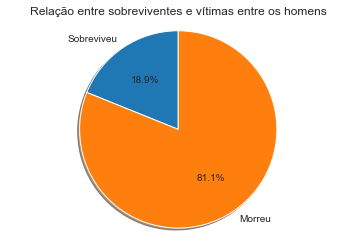

In [13]:
df_male = df_titanic.query("sex == 'male'")
df_male_survived = df_male.query('survived == 1')
df_male_died = df_male.query('survived == 0')

labels = 'Sobreviveu', 'Morreu'
sizes = [len(df_male_survived), len(df_male_died)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Relação entre sobreviventes e vítimas entre os homens')

### A seguir temos o gráfico com a relação entre mortos e sobreviventes entre as mulheres.

Text(0.5, 1.0, 'Relação entre sobreviventes e vítimas entre as mulheres')

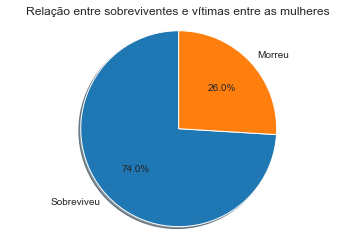

In [14]:
df_female = df_titanic.query("sex == 'female'")
df_female_survived = df_female.query('survived == 1')
df_female_died = df_female.query('survived == 0')

labels = 'Sobreviveu', 'Morreu'
sizes = [len(df_female_survived), len(df_female_died)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Relação entre sobreviventes e vítimas entre as mulheres')

Observamos nos gráficos acima que o número de mortos entre homens e mulheres foi bem discrepante, o que corrobora a versão do famoso filme sobre a tragédia do Titanic, onde vários homens se sacrificam para que suas mulheres e filhos saiam ilesos do acidente.

### A seguir temos o gráfico com a relação entre mortos e sobreviventes entre os passageiros da 1ª classe.

Text(0.5, 1.0, 'Relação entre sobreviventes e vítimas na 1ª classe')

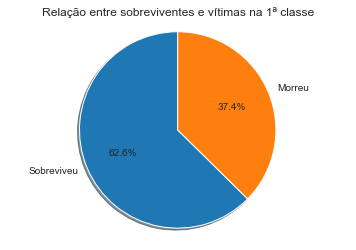

In [15]:
df_1_class = df_titanic.query('pclass == 1')
df_1_class_survived = df_1_class.query('survived == 1')
df_1_class_died = df_1_class.query('survived == 0')

labels = 'Sobreviveu', 'Morreu'
sizes = [len(df_1_class_survived), len(df_1_class_died)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Relação entre sobreviventes e vítimas na 1ª classe')

### A seguir temos o gráfico com a relação entre mortos e sobreviventes entre os passageiros da 2ª classe.

Text(0.5, 1.0, 'Relação entre sobreviventes e vítimas na 2ª classe')

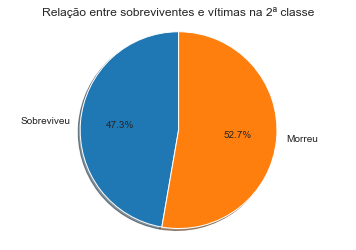

In [16]:
df_2_class = df_titanic.query('pclass == 2')
df_2_class_survived = df_2_class.query('survived == 1')
df_2_class_died = df_2_class.query('survived == 0')

labels = 'Sobreviveu', 'Morreu'
sizes = [len(df_2_class_survived), len(df_2_class_died)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Relação entre sobreviventes e vítimas na 2ª classe')

### A seguir temos o gráfico com a relação entre mortos e sobreviventes entre os passageiros da 3ª classe.

Text(0.5, 1.0, 'Relação entre sobreviventes e vítimas na 3ª classe')

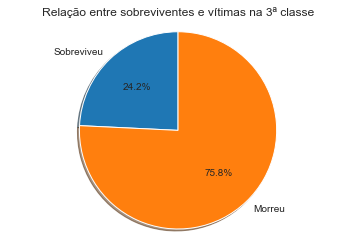

In [17]:
df_3_class = df_titanic.query('pclass == 3')
df_3_class_survived = df_3_class.query('survived == 1')
df_3_class_died = df_3_class.query('survived == 0')

labels = 'Sobreviveu', 'Morreu'
sizes = [len(df_3_class_survived), len(df_3_class_died)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Relação entre sobreviventes e vítimas na 3ª classe')

Analisando os gráficos acima, vemos que a porcetagem de mortos cresce conforme o seu ticket é mais barato, o que corrobora novamente a versão do famoso filme, onde houve privilégios para os mais ricos na distribuição do botes e coletes salva-vidas

### Abaixo temos um gráfico de dispersão que mostra a relação entre o preço dos tickets e os mortos

23. Quais fatores contribuíram para a sobrevivência dos passageiros a bordo? 

Onde fica claro novamente que o preço do ticket influenciou diretamente se o passageiro sobreviveu ou morreu(O mais caro de todos, ninguém morreu). 0.0 - Morreu, 1.0 - Sobreviveu

Text(0.5, 1.0, 'Gráfico de dispersão entre o preço do ticket a situação na tragédia, morto ou sobrevivente')

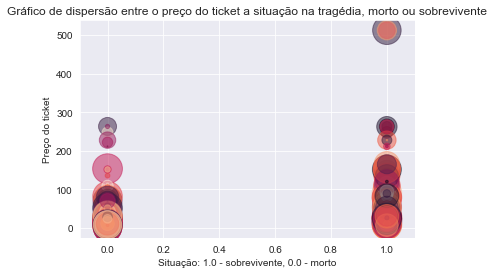

In [18]:
lenght = len(df_titanic)
survived = df_titanic['survived']
fare = df_titanic['fare']
colors = np.random.rand(lenght)
area = (30 * np.random.rand(lenght))**2

plt.scatter(survived, fare, c=colors, s=area, alpha=0.5)
plt.ylabel('Preço do ticket')
plt.xlabel('Situação: 1.0 - sobrevivente, 0.0 - morto')
plt.title('Gráfico de dispersão entre o preço do ticket a situação na tragédia, morto ou sobrevivente')

Vemos no gráfico de barras acima, a representação de mortos e sobreviventes de todos os tipos de tickets, da 1ª à 3ª classe, e observamos melhor a tendência de maior chance de sobrevivência quanto for mais caro o ticket.

### Os gráficos abaixo são também relações entre mortos e sobreviventes entre as mulheres e homens, e também a relação dos tickets de 1ª, 2ª e 3ª classe entre mortos e sobreviventes, só que agora representados por gráficos de barras

Obtenha as contagens para cada sexo e situação(sobreviveu ou morreu)

In [19]:
def get_ind(dataset):
    """Pega um DataFrame e retorma uma matriz com os valores uniformemente espaçados.
    
    INPUT:
    dataset: pd.DataFrame. Um DataFrame do Pandas
    
    OUTPUT: 
    arange : ndarray. Matriz de valores uniformemente espaçados
    """
    return np.arange(len(dataset))

In [20]:
sex_counts = df_titanic.groupby(['sex', 'survived']).count()['pclass']
sex_counts

sex     survived
female  0            81
        1           231
male    0           468
        1           109
Name: pclass, dtype: int64

Obtenha a contagem total para cada sexo

In [21]:
sex_totals = df_titanic.groupby('sex').count()['pclass']
sex_totals

sex
female    312
male      577
Name: pclass, dtype: int64

Obtenha proporções dividindo as contagens do sexo masculino pelo número total de passageiros homem

In [22]:
male_proportions = sex_counts['male'] / sex_totals['male']
male_proportions

survived
0    0.811092
1    0.188908
Name: pclass, dtype: float64

Obtenha proporções dividindo as contagens do sexo feminino pelo número total de passageiros mulher

In [23]:
female_proportions = sex_counts['female'] / sex_totals['female']
female_proportions

survived
0    0.259615
1    0.740385
Name: pclass, dtype: float64

ind - a localização no eixo x dos grupos, width - a largura das barras

In [24]:
ind = get_ind(male_proportions)
width = 0.35 

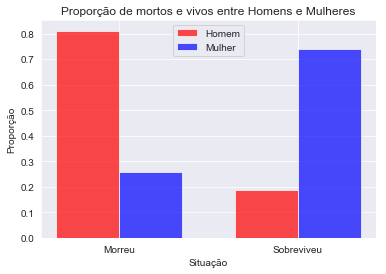

In [25]:
male_bars = plt.bar(ind, male_proportions, width, color='r', alpha=.7, label='Homem')
female_bars = plt.bar(ind + width, female_proportions, width, color='b', alpha=.7, label='Mulher')

plt.ylabel('Proporção')
plt.xlabel('Situação')
plt.title('Proporção de mortos e vivos entre Homens e Mulheres')
locations = ind + width / 2
labels = ['Morreu', 'Sobreviveu']
plt.xticks(locations, labels)

plt.legend()

Vemos no gráfico acima a comparação por meio do gráfico de barras entre mortos e sobreviventes entre Homens e Mulheres, e vemos claramente que muito mais homens morreram em relação as mulheres, como obviamente, sobreviveram muito menos homens, que é o complemento.

Obtenha as contagens para cada classe e situação(sobreviveu ou morreu)

In [26]:
class_counts = df_titanic.groupby(['pclass', 'survived']).count()['sex']
class_counts

pclass  survived
1       0            80
        1           134
2       0            97
        1            87
3       0           372
        1           119
Name: sex, dtype: int64

Obtenha a contagem total para cada classe

In [27]:
class_totals = df_titanic.groupby('pclass').count()['sex']
class_totals

pclass
1    214
2    184
3    491
Name: sex, dtype: int64

Obtenha proporções dividindo as contagens de primeira classe pelo número total de passagens da primeira classe

In [28]:
class_1_proportions = class_counts[1] / class_totals[1]
class_1_proportions

survived
0    0.373832
1    0.626168
Name: sex, dtype: float64

Obtenha proporções dividindo as contagens de segunda classe pelo número total de passagens da segunda classe

In [29]:
class_2_proportions = class_counts[2] / class_totals[2]
class_2_proportions

survived
0    0.527174
1    0.472826
Name: sex, dtype: float64

Obtenha proporções dividindo as contagens de terceira classe pelo número total de passagens da terceira classe

In [30]:
class_3_proportions = class_counts[3] / class_totals[3]
class_3_proportions

survived
0    0.757637
1    0.242363
Name: sex, dtype: float64

In [31]:
ind = get_ind(class_3_proportions)
width = 0.30  

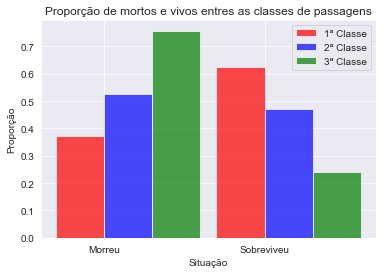

In [32]:
class_1_bars = plt.bar(ind, class_1_proportions, width, color='r', alpha=.7, label='1ª Classe')
class_2_bars = plt.bar(ind + width, class_2_proportions, width, color='b', alpha=.7, label='2ª Classe')
class_3_bars = plt.bar(ind + width + width, class_3_proportions, width, color='g', alpha=.7, label='3ª Classe')

plt.ylabel('Proporção')
plt.xlabel('Situação')
plt.title('Proporção de mortos e vivos entres as classes de passagens')
locations = ind + width / 2
labels = ['Morreu', 'Sobreviveu']
plt.xticks(locations, labels)

plt.legend()

Vemos no gráfico de barras acima, a representação de mortos e sobreviventes de todos os tipos de tickets, da 1ª à 3ª classe, e observamos melhor a tendência de maior chance de sobrevivência quanto for mais caro o ticket.

## Conclusões

Podemos concluir com a análise dos dados acima, que tanto o fator sexo, quanto o fator classe do ticket, influenciaram diretamente se o passageiro sobreviveu ou não a tragédia.

Mais de 80% do homens morreram, em detrimento dos quase 26% de mulheres que morreram no acidente.

Já as classes, temos que os passageiros de 1ª classe, apenas 37% morreram, e esse número vai aumentando conforme a classe do ticket aumenta, onde 52% dos passageiros de 2ª classe morreram, e finalmente mais de 75% dos passageiros de 3ª classe morreram na tragédia. Vemos claramente um benefício maior na distruição dos meios de sobrevivência quanto mais rico fosse o passageiro, muito bem retradado no filme clássico Titanic de 1997.

## Limitações

Logo de cara abrindo os dados, percebe-se que algumas colunas são desnecessárias na nossa análise ou estão com valores faltantes, são elas `Age`, `Cabin` e `Embarked`.

### Medida tomada

1. Age - Atribuimos a média das colunas ao valores faltantes.

2. Cabin - Removemos essa coluna i

### Referências

1. Documentação oficial do [Pandas](https://pandas.pydata.org/pandas-docs/stable/api.html)
2. Documentação oficial do [Matplotlib](https://matplotlib.org/api/pyplot_summary.html)
3. Documentação oficial do [NumPy](https://docs.scipy.org/doc/numpy/reference/index.html)
4. [Stackoverflow](https://stackoverflow.com/)